In [8]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
data = pd.read_csv('Data_for_analysis.csv')
y = data['Accident_Severity']
X = data.drop(columns = ['Accident_Severity'])


3) Calcul du VIF

In [10]:
X = X.astype(float)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,Unnamed: 0,1.031939
1,2021-01,inf
2,2021-02,inf
3,2021-03,inf
4,2021-04,inf
5,2021-05,inf
6,2021-06,inf
7,2021-07,inf
8,2021-08,inf
9,2021-09,inf


VIF tres elevé bcp de multicolinéarité, une regression de Poisson n'est pas idéale 

In [12]:
import statsmodels.api as sm

X = sm.add_constant(X)
ridge_poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit_regularized(alpha=0.1, L1_wt=0.0)


coef_ridge = ridge_poisson.params

poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

summary_table = poisson_model.summary2().tables[1]
summary_table["Coefficient (Ridge)"] = coef_ridge  # Ajouter les coefficients Ridge
summary_table = summary_table[["Coefficient (Ridge)", "Std.Err.", "z", "P>|z|"]]  # Filtrer les colonnes utiles

pd.set_option("display.max_rows", None)
summary_table.head(100)


c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\families\family.py:477: RuntimeWarning: invalid value encountered in subtract
  return var_weights / scale * (endog * np.log(mu) - mu -
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:522: RuntimeWarning: overflow encountered in divide
  score_factor = (self.endog - mu) / self.family.link.deriv(mu)
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:523: RuntimeWarning: invalid value encountered in divide
  score_factor /= self.family.variance(mu)
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:527

,Coefficient (Ridge),Std.Err.,z,P>|z|
const,1.111720,0.499927,0.208217,0.835060
Unnamed: 0,1032.488495,0.000039,-0.488983,0.624854
2021-01,0.060574,0.196772,-0.090826,0.927631
2021-02,0.042758,0.151057,-0.244851,0.806572
2021-03,0.046322,0.111668,-0.172358,0.863156
2021-04,0.067701,0.151275,0.544135,0.586349
2021-05,0.046322,0.202792,0.109033,0.913176
2021-06,0.053448,0.241526,0.556793,0.577669
2021-07,0.060574,0.217512,0.427443,0.669057
2021-08,0.046322,0.157279,0.218855,0.826763


Très mauvais résultats avec des quasiment aucun des coefficients significatifs. Nous tentons  une autre approche en faisant une ACP, qui servirait a regrouper des variables colinéaires sur un même axe et simplifierait notre analyse

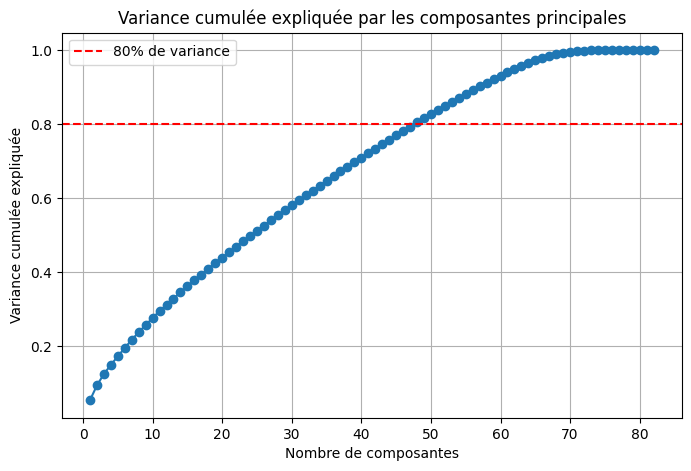

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réalisation de l'ACP sur toutes les composantes
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

# Calcul de la variance cumulée
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée expliquée')
plt.title('Variance cumulée expliquée par les composantes principales')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% de variance')
plt.legend()
plt.grid(True)
plt.show()

In [181]:
X.shape

(1878, 81)

Nous avons voulu réduire les dimensions de notre modèle avec une ACP mais, pour atteindre un modèle qui explique au moins 80% de la variance, il nous aurait fallu choisir 50 composantes principales, ce qui est un chiffre bien trop élevé et enlève tout l'intérêt de l'ACP.

Stepwise Selection:

Forward step : tester l’ajout de chaque variable non incluse pour identifier celle qui diminue le plus l’AIC.

In [15]:
import statsmodels.api as sm

def stepwise_selection(X, y, initial_list=[], verbose=True):
    """
    Sélection de variables par régression pas à pas basée sur l’AIC.
    Utilise un modèle de Poisson (GLM) pour ajouter ou retirer des variables.
    
    Parameters:
      X: DataFrame des variables explicatives.
      y: Série de la variable cible.
      initial_list: Liste initiale (peut être vide).
      verbose: Affichage des étapes.
      
    Returns:
      La liste des variables sélectionnées.
    """
    included = list(initial_list)
    while True:
        changed = False
        
        # ----- Étape Forward : Ajouter la variable qui minimise l'AIC -----
        excluded = list(set(X.columns) - set(included))
        best_aic = float('inf')
        best_feature = None
        for new_column in excluded:
            model = sm.GLM(y, sm.add_constant(pd.DataFrame(X[included + [new_column]])),
                           family=sm.families.Poisson()).fit()
            current_aic = model.aic
            if current_aic < best_aic:
                best_aic = current_aic
                best_feature = new_column
        if best_feature is not None:
            if len(included) == 0:
                current_model_aic = float('inf')
            else:
                current_model = sm.GLM(y, sm.add_constant(pd.DataFrame(X[included])),
                                       family=sm.families.Poisson()).fit()
                current_model_aic = current_model.aic
            if best_aic < current_model_aic:
                included.append(best_feature)
                changed = True
                if verbose:
                    print('Ajouter {} avec AIC = {:.2f}'.format(best_feature, best_aic))
        
        # ----- Étape Backward : Supprimer la variable qui améliore l'AIC -----
        if len(included) > 0:
            model = sm.GLM(y, sm.add_constant(pd.DataFrame(X[included])),
                           family=sm.families.Poisson()).fit()
            current_aic = model.aic
            aic_with_drop = {}
            for feature in included:
                features_subset = list(included)
                features_subset.remove(feature)
                if len(features_subset) == 0:
                    aic_with_drop[feature] = float('inf')
                else:
                    temp_model = sm.GLM(y, sm.add_constant(pd.DataFrame(X[features_subset])),
                                        family=sm.families.Poisson()).fit()
                    aic_with_drop[feature] = temp_model.aic
            worst_feature = min(aic_with_drop, key=aic_with_drop.get)
            worst_aic = aic_with_drop[worst_feature]
            if worst_aic < current_aic:
                included.remove(worst_feature)
                changed = True
                if verbose:
                    print('Supprimer {} pour AIC = {:.2f}'.format(worst_feature, worst_aic))
        
        if not changed:
            break

    return included

# Exemple d'utilisation :
# Supposons que "data_encoded" est votre DataFrame final avec 'Accident_Severity' comme variable cible.


selected_features_aic = stepwise_selection(X, y)
print("Variables sélectionnées :", selected_features_aic)

X_aic = X[selected_features_aic]

Ajouter Speed_limit avec AIC = 4159.99
Ajouter Time_Category_Nuit avec AIC = 4159.41
Ajouter Junction_Detail_Roundabout avec AIC = 4159.37
Variables sélectionnées : ['Speed_limit', 'Time_Category_Nuit', 'Junction_Detail_Roundabout']


Autre méthode de sélection de variable: Elastic Net combine la pénalité L1 et L2, initialise les coefs à 0 si ne sont pas révélateurs

In [16]:
import statsmodels.api as sm
import pandas as pd

# Supposons que X et y soient vos variables explicatives et la variable cible
# On ajoute une constante aux variables explicatives
X_const = sm.add_constant(X)

# Choix d'une valeur de régularisation
alpha_value = 0.1  # à ajuster selon vos besoins

# Ajustement d'un modèle de Poisson avec régularisation Elastic Net
# Ici, L1_wt=0.5 signifie un mélange égal entre L1 et L2.
model_reg = sm.GLM(y, X_const, family=sm.families.Poisson()).fit_regularized(alpha=alpha_value, L1_wt=0.5)

# Affichage des coefficients
print("Coefficients du modèle régularisé :")
print(model_reg.params)

# Sélection des variables dont le coefficient n'est pas négligeable (seuil arbitraire, par exemple 1e-4)
selected_features_en = model_reg.params[model_reg.params.abs() > 1e-4].index.tolist()

# Supprimer la constante si présente
if 'const' in selected_features_en:
    selected_features_en.remove('const')

print("Variables sélectionnées :", selected_features_en)
X_en = X[selected_features_en]


Coefficients du modèle régularisé :
const                                                   0.000000
Unnamed: 0                                             -0.000008
2021-01                                                 0.000000
2021-02                                                 0.000000
2021-03                                                 0.000000
2021-04                                                 0.000000
2021-05                                                 0.000000
2021-06                                                 0.000000
2021-07                                                 0.000000
2021-08                                                 0.000000
2021-09                                                 0.000000
2021-10                                                 0.000000
2021-11                                                 0.000000
2021-12                                                 0.000000
2022-01                                               

c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import PoissonRegressor
# Normalisation des variables explicatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Création du modèle de régression Poisson
poisson_model = PoissonRegressor(alpha=0.1, max_iter=1000)

# On choisit le nombre de variables à conserver (par exemple 10)
n_features_to_select = 10
selector = RFE(estimator=poisson_model, n_features_to_select=n_features_to_select, step=1)
selector = selector.fit(X_scaled, y)

selected_features_rfe = X.columns[selector.support_]
print("Variables sélectionnées par RFE :", selected_features_rfe.tolist())
X_rfe = X[selected_features_rfe]


Variables sélectionnées par RFE : ['2021-04', '2021-09', 'Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit', 'Urban_or_Rural_Area', 'Junction_Detail_Roundabout', 'Road_Type_Slip road', 'Time_Category_Nuit', 'Time_Category_Soir']


Sélection via un modèle d'arbre:

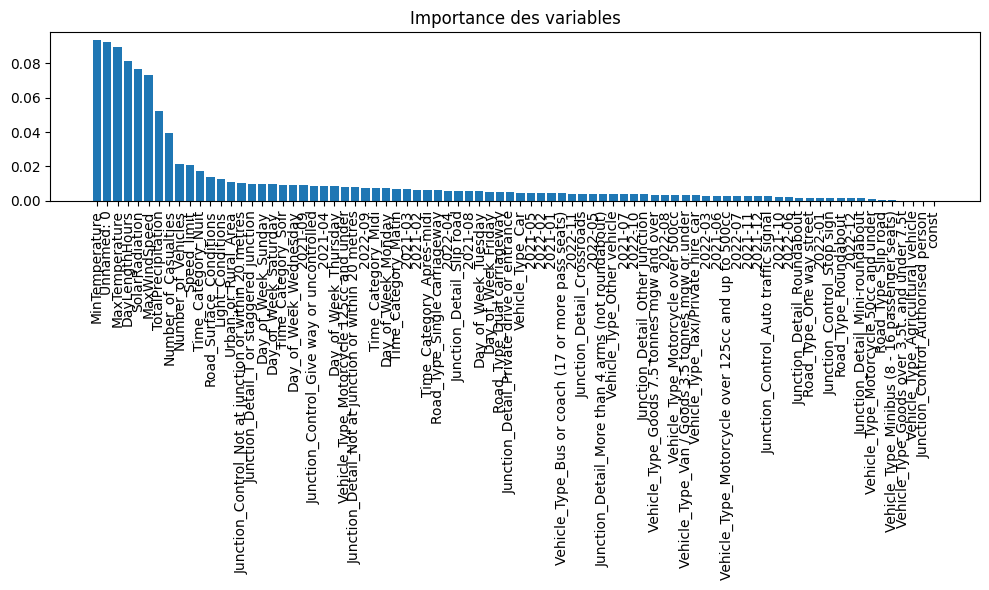

Variables retenues par seuil d'importance (>= 0.01) : ['Unnamed: 0', 'DayLengthHours', 'Light_Conditions', 'MaxTemperature', 'MaxWindSpeed', 'MinTemperature', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions', 'SolarRadiation', 'Speed_limit', 'TotalPrecipitation', 'Urban_or_Rural_Area', 'Junction_Control_Not at junction or within 20 metres', 'Time_Category_Nuit']


In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalisation des variables explicatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Création d'un modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# Récupération et tri des importances
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
selected_features_rf = X.columns[indices]

# Affichage graphique des importances
plt.figure(figsize=(10, 6))
plt.title("Importance des variables")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), selected_features_rf, rotation=90)
plt.tight_layout()
plt.show()

# Vous pouvez ensuite retenir par exemple les variables dont l'importance est supérieure à un seuil.
threshold = 0.01
selected_features_rf_threshold = X.columns[importances >= threshold]
print("Variables retenues par seuil d'importance (>= 0.01) :", selected_features_rf_threshold.tolist())
X_tree = X[selected_features_rf_threshold]


Nous réappliquons la régression de poisson à chacun des nouveaux modèles et nous ne garderons que celui avec de meilleurs résultats

In [19]:
#1) avec AIC

ridge_poisson_aic = sm.GLM(y, X_aic, family=sm.families.Poisson()).fit_regularized(alpha=0.1, L1_wt=0.0)


coef_ridge_aic = ridge_poisson_aic.params

poisson_model_aic = sm.GLM(y, X_aic, family=sm.families.Poisson()).fit()

summary_table_aic = poisson_model_aic.summary2().tables[1]
summary_table_aic["Coefficient (Ridge)"] = coef_ridge_aic  # Ajouter les coefficients Ridge
summary_table_aic = summary_table_aic[["Coefficient (Ridge)", "Std.Err.", "z", "P>|z|"]]  # Filtrer les colonnes utiles

pd.set_option("display.max_rows", None)
summary_table_aic.head(10)

,Coefficient (Ridge),Std.Err.,z,P>|z|
Speed_limit,0.003695,0.000538,6.805068,1.010015e-11
Time_Category_Nuit,0.058571,0.078298,1.611159,1.071450e-01
Junction_Detail_Roundabout,-0.049940,0.081558,-1.331573,1.830004e-01


1.010015e-11 se convertit en :
0.00000000001010015

Valeur p : 1.071450e-01 → 0.1071450

Valeur p : 1.830004e-01 → 0.1830004

In [20]:
#1) avec RFE

ridge_poisson_rfe = sm.GLM(y, X_rfe, family=sm.families.Poisson()).fit_regularized(alpha=0.1, L1_wt=0.0)


coef_ridge_rfe = ridge_poisson_rfe.params

poisson_model_rfe = sm.GLM(y, X_rfe, family=sm.families.Poisson()).fit()

summary_table_rfe = poisson_model_rfe.summary2().tables[1]
summary_table_rfe["Coefficient (Ridge)"] = coef_ridge_rfe  # Ajouter les coefficients Ridge
summary_table_rfe = summary_table_rfe[["Coefficient (Ridge)", "Std.Err.", "z", "P>|z|"]]  # Filtrer les colonnes utiles

pd.set_option("display.max_rows", None)
summary_table_rfe.head(10)

,Coefficient (Ridge),Std.Err.,z,P>|z|
2021-04,0.025028,0.107208,0.782211,0.434090
2021-09,0.025646,0.102711,0.785517,0.432150
Number_of_Casualties,0.043436,0.027575,1.733890,0.082938
Number_of_Vehicles,-0.035543,0.030302,-1.328940,0.183868
Speed_limit,0.003565,0.001212,2.809422,0.004963
Urban_or_Rural_Area,0.009905,0.040019,0.270503,0.786774
Junction_Detail_Roundabout,-0.044706,0.082249,-1.133276,0.257098
Road_Type_Slip road,-0.017880,0.237945,-0.760005,0.447251
Time_Category_Nuit,0.057602,0.079246,1.611788,0.107008
Time_Category_Soir,0.039889,0.067471,1.132115,0.257586


In [21]:

ridge_poisson_tree = sm.GLM(y, X_tree, family=sm.families.Poisson()).fit_regularized(alpha=0.1, L1_wt=0.0)


coef_ridge_tree = ridge_poisson_tree.params

poisson_model_tree = sm.GLM(y, X_tree, family=sm.families.Poisson()).fit()

summary_table_tree = poisson_model_tree.summary2().tables[1]
summary_table_tree["Coefficient (Ridge)"] = coef_ridge_tree  # Ajouter les coefficients Ridge
summary_table_tree = summary_table_tree[["Coefficient (Ridge)", "Std.Err.", "z", "P>|z|"]]  # Filtrer les colonnes utiles

pd.set_option("display.max_rows", None)
summary_table_tree.head(10)

c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\families\family.py:477: RuntimeWarning: invalid value encountered in subtract
  return var_weights / scale * (endog * np.log(mu) - mu -
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:522: RuntimeWarning: overflow encountered in divide
  score_factor = (self.endog - mu) / self.family.link.deriv(mu)
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:523: RuntimeWarning: invalid value encountered in divide
  score_factor /= self.family.variance(mu)
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:527

,Coefficient (Ridge),Std.Err.,z,P>|z|
Unnamed: 0,1032.490375,0.000038,-0.414052,0.678836
DayLengthHours,13.892189,0.012920,1.373793,0.169506
Light_Conditions,1.699652,0.039168,-0.617007,0.537230
MaxTemperature,15.611498,0.009687,0.257169,0.797048
MaxWindSpeed,24.012838,0.002628,0.266614,0.789766
MinTemperature,7.997272,0.009804,-0.623226,0.533136
Number_of_Casualties,1.703215,0.027909,1.781587,0.074817
Number_of_Vehicles,1.906318,0.031619,-1.648947,0.099158
Road_Surface_Conditions,1.557123,0.031040,-0.350923,0.725646
SolarRadiation,12.467178,0.006060,-0.791019,0.428933


Dernière méthode de sélection: supprimer les variables avec un VIF supérieur à 10:

In [22]:
X_vif = vif_data[vif_data["VIF"]<=10]
X_vif= X[X_vif['Variable']]

ridge_poisson_vif = sm.GLM(y, X_vif, family=sm.families.Poisson()).fit_regularized(alpha=0.1, L1_wt=0.0)


coef_ridge_vif = ridge_poisson_vif.params

poisson_model_vif = sm.GLM(y, X_vif, family=sm.families.Poisson()).fit()

summary_table_vif = poisson_model_vif.summary2().tables[1]
summary_table_vif["Coefficient (Ridge)"] = coef_ridge_vif  # Ajouter les coefficients Ridge
summary_table_vif = summary_table_vif[["Coefficient (Ridge)", "Std.Err.", "z", "P>|z|"]]  # Filtrer les colonnes utiles

pd.set_option("display.max_rows", None)
summary_table_vif.head(10)

c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\families\family.py:477: RuntimeWarning: invalid value encountered in subtract
  return var_weights / scale * (endog * np.log(mu) - mu -
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:522: RuntimeWarning: overflow encountered in divide
  score_factor = (self.endog - mu) / self.family.link.deriv(mu)
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:523: RuntimeWarning: invalid value encountered in divide
  score_factor /= self.family.variance(mu)
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:527

,Coefficient (Ridge),Std.Err.,z,P>|z|
Unnamed: 0,1032.701221,0.000038,-0.144928,0.884767
Light_Conditions,1.699999,0.034707,-0.620692,0.534803
MaxWindSpeed,24.017741,0.002576,0.635445,0.525138
MinTemperature,7.998905,0.004618,-0.267713,0.788920
Number_of_Casualties,1.703563,0.027602,1.930172,0.053585
Number_of_Vehicles,1.906707,0.031265,-1.561957,0.118298
Road_Surface_Conditions,1.557441,0.030600,-0.082655,0.934126
SolarRadiation,12.469724,0.003376,0.782231,0.434079
Speed_limit,48.647767,0.001621,2.247921,0.024581
TotalPrecipitation,2.335806,0.005864,0.027296,0.978223
